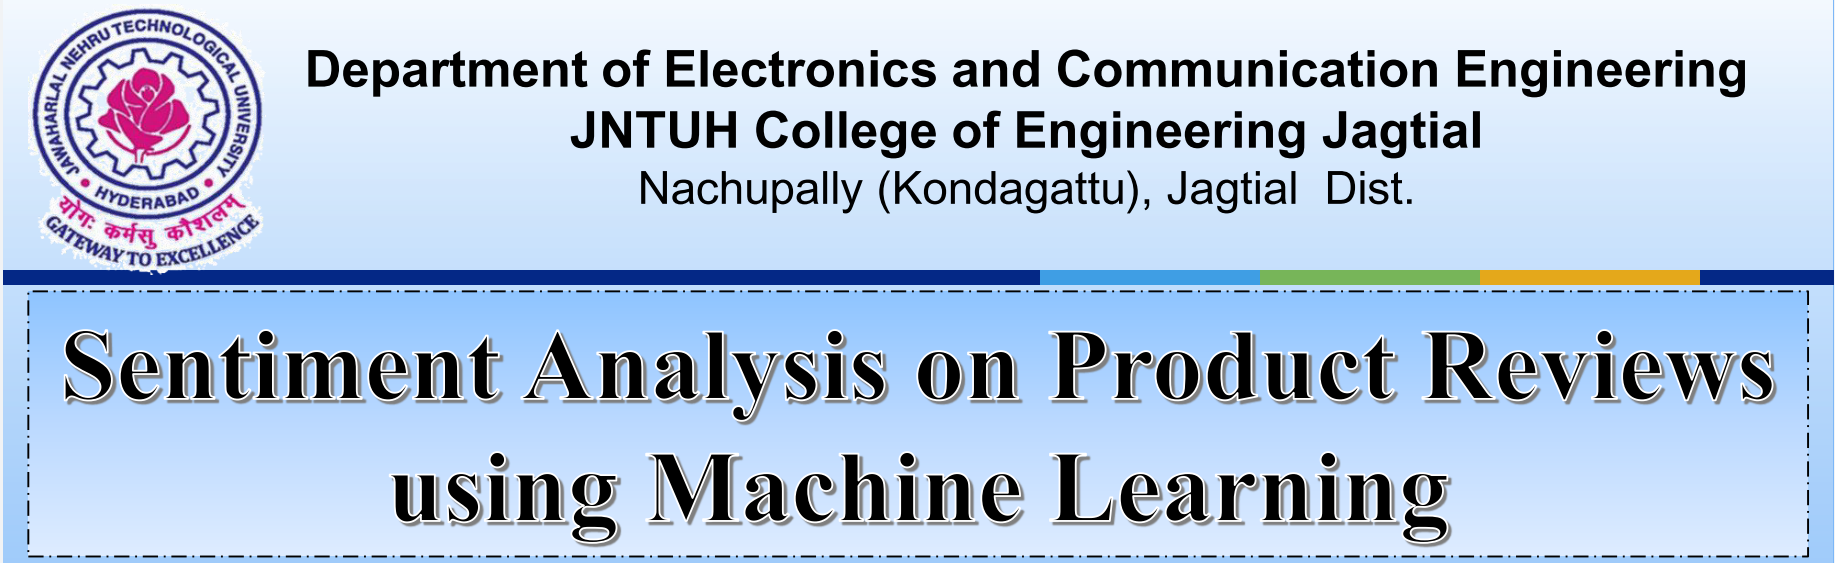

# Importing Required Libraries

In [1]:
import pandas as pd 
import numpy as np
import sklearn
import string
import warnings
warnings.filterwarnings(action= 'ignore')

# Load Dataset

In [2]:
data = pd.read_csv('amazon_baby.csv')

In [3]:
data.shape

(183531, 3)

In [4]:
data.head()

,name,review,rating
0,Planetwise Flannel Wipes,"These flannel wipes are OK, but in my opinion ...",3
1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5


In [5]:
data.tail()

,name,review,rating
183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5
183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5
183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5
183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5
183530,Best 2 Pack Baby Car Shade for Kids - Window S...,I love this product very mush . I have bought ...,5


In [6]:
data.describe()

,rating
count,183531.000000
mean,4.120448
std,1.285017
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [7]:
data.describe(include="all")

,name,review,rating
count,183213,182702,183531.000000
unique,32417,182642,NaN
top,Vulli Sophie the Giraffe Teether,very nice,NaN
freq,785,5,NaN
mean,NaN,NaN,4.120448
std,NaN,NaN,1.285017
min,NaN,NaN,1.000000
25%,NaN,NaN,4.000000
50%,NaN,NaN,5.000000
75%,NaN,NaN,5.000000


In [8]:
data.columns

Index(['name', 'review', 'rating'], dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183531 entries, 0 to 183530
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   name    183213 non-null  object
 1   review  182702 non-null  object
 2   rating  183531 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 4.2+ MB


In [10]:
data['rating'].value_counts()

5    107054
4     33205
3     16779
1     15183
2     11310
Name: rating, dtype: int64

In [11]:
data = data[data['rating'] != 3]
data.reset_index(inplace=True)
data.head()

,index,name,review,rating
0,1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5
1,2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5
2,3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5
3,4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5
4,5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5


In [12]:
data['rating'].value_counts()

5    107054
4     33205
1     15183
2     11310
Name: rating, dtype: int64

# Perform Text Cleaning

In [13]:
def remove_punctuation(text):
    text = str(text).lower()
    table1 = text.maketrans('1234567890','          ',string.punctuation)
    text = text.replace('not ','not')
    text = text.replace('dont ','dont')
    text = text.replace('very ','very')
    text = text.translate(table1)
    return text

In [14]:
data['review_clean'] = data['review'].apply(remove_punctuation)
data.head()

,index,name,review,rating,review_clean
0,1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was notdisappointed i love p...
1,2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,verysoft and comfortable and warmer than it lo...
2,3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,this is a product well worth the purchase i h...
3,4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,all of my kids have cried nonstop when i tried...
4,5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,when the binky fairy came to our house we didn...


In [15]:
print(data['review'][0])

it came early and was not disappointed. i love planet wise bags and now my wipe holder. it keps my osocozy wipes moist and does not leak. highly recommend it.


In [16]:
print(data['review_clean'][0])

it came early and was notdisappointed i love planet wise bags and now my wipe holder it keps my osocozy wipes moist and does notleak highly recommend it


In [17]:
print(data['review'][5])

Lovely book, it's bound tightly so you may not be able to add alot of photos/cards aside from the designated spaces in the book. Shop around before you purchase, as it is currently listed at Barnes & Noble for 29.95!


In [18]:
print(data['review_clean'][5])

lovely book its bound tightly so you may notbe able to add alot of photoscards aside from the designated spaces in the book shop around before you purchase as it is currently listed at barnes  noble for     


In [19]:
data['review_clean'].isna().value_counts()

False    166752
Name: review_clean, dtype: int64

In [20]:
data['review'].isna().value_counts()

False    165975
True        777
Name: review, dtype: int64

In [21]:
data.fillna({'review' : ''}, inplace= True)
data['review'].isna().value_counts()

False    166752
Name: review, dtype: int64

In [22]:
data['sentiment'] = data['rating'].apply(lambda rating : +1 if rating > 3 else -1)
data

,index,name,review,rating,review_clean,sentiment
0,1,Planetwise Wipe Pouch,it came early and was not disappointed. i love...,5,it came early and was notdisappointed i love p...,1
1,2,Annas Dream Full Quilt with 2 Shams,Very soft and comfortable and warmer than it l...,5,verysoft and comfortable and warmer than it lo...,1
2,3,Stop Pacifier Sucking without tears with Thumb...,This is a product well worth the purchase. I ...,5,this is a product well worth the purchase i h...,1
3,4,Stop Pacifier Sucking without tears with Thumb...,All of my kids have cried non-stop when I trie...,5,all of my kids have cried nonstop when i tried...,1
4,5,Stop Pacifier Sucking without tears with Thumb...,"When the Binky Fairy came to our house, we did...",5,when the binky fairy came to our house we didn...,1
...,...,...,...,...,...,...
166747,183526,Baby Teething Necklace for Mom Pretty Donut Sh...,Such a great idea! very handy to have and look...,5,such a great idea veryhandy to have and look r...,1
166748,183527,Baby Teething Necklace for Mom Pretty Donut Sh...,This product rocks! It is a great blend of fu...,5,this product rocks it is a great blend of fun...,1
166749,183528,Abstract 2 PK Baby / Toddler Training Cup (Pink),This item looks great and cool for my kids.......,5,this item looks great and cool for my kidsi kn...,1
166750,183529,"Baby Food Freezer Tray - Bacteria Resistant, B...",I am extremely happy with this product. I have...,5,i am extremely happy with this product i have ...,1


In [23]:
data['sentiment'].value_counts()

 1    140259
-1     26493
Name: sentiment, dtype: int64

# Split the Dataset into Train and Test data

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data['sentiment'], test_size=0.2, random_state=4, shuffle = True)

In [25]:
print("X_train.shape : ", X_train.shape,"X_test.shape : ", X_test.shape)

X_train.shape :  (133401, 6) X_test.shape :  (33351, 6)


In [26]:
y_train.value_counts()

 1    112190
-1     21211
Name: sentiment, dtype: int64

In [27]:
y_test.value_counts()

 1    28069
-1     5282
Name: sentiment, dtype: int64

In [28]:
y_train

6128      1
149235    1
47363    -1
156256    1
79798     1
         ..
115144    1
142935    1
129384    1
120705    1
115397    1
Name: sentiment, Length: 133401, dtype: int64

# Build the word count vector for each review

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = CountVectorizer(stop_words = 'english')

tfidf = TfidfVectorizer(stop_words = 'english')

train_matrix = vectorizer.fit_transform(X_train['review_clean'])
train_matrix1 = tfidf.fit_transform(X_train['review_clean'])

test_matrix = vectorizer.transform(X_test['review_clean'])
test_matrix1 = tfidf.transform(X_test['review_clean'])

In [30]:
print("vectorizer shape : ",len(vectorizer.vocabulary_),"\ntfidf shape : ", len(tfidf.vocabulary_))

vectorizer shape :  117011 
tfidf shape :  117011


In [31]:
vectorizer.vocabulary_

{'high': 44022,
 'quality': 79950,
 'works': 115486,
 'pregnant': 77145,
 'woman': 115072,
 'sleeps': 90657,
 'guess': 41476,
 'really': 81247,
 'helped': 43574,
 'wife': 114400,
 'sleep': 90531,
 'better': 8878,
 'pain': 72294,
 'cannotbe': 13861,
 'product': 78169,
 'nice': 62049,
 'small': 91049,
 'plenty': 75564,
 'sound': 92727,
 'use': 107349,
 'waveocean': 112847,
 'white': 114145,
 'noise': 62624,
 'just': 50509,
 'songmusic': 92413,
 'bit': 9509,
 'annoying': 3273,
 'fall': 34025,
 'asleep': 4690,
 'perfect': 73612,
 'multiple': 60442,
 'levels': 52991,
 'speakers': 93089,
 'sides': 89416,
 'device': 25170,
 'choose': 16750,
 'turn': 105060,
 'min': 57894,
 'everynight': 32189,
 'little': 53916,
 'recommend': 81816,
 'great': 40761,
 'working': 115424,
 'monitor': 59201,
 'worked': 115376,
 'day': 23448,
 'son': 92387,
 'grabbed': 40303,
 'cord': 20682,
 'main': 55556,
 'dropped': 28487,
 'floor': 36197,
 'tried': 104361,
 'different': 25724,
 'cords': 20702,
 'got': 40217,
 '

In [32]:
tfidf.vocabulary_

{'high': 44022,
 'quality': 79950,
 'works': 115486,
 'pregnant': 77145,
 'woman': 115072,
 'sleeps': 90657,
 'guess': 41476,
 'really': 81247,
 'helped': 43574,
 'wife': 114400,
 'sleep': 90531,
 'better': 8878,
 'pain': 72294,
 'cannotbe': 13861,
 'product': 78169,
 'nice': 62049,
 'small': 91049,
 'plenty': 75564,
 'sound': 92727,
 'use': 107349,
 'waveocean': 112847,
 'white': 114145,
 'noise': 62624,
 'just': 50509,
 'songmusic': 92413,
 'bit': 9509,
 'annoying': 3273,
 'fall': 34025,
 'asleep': 4690,
 'perfect': 73612,
 'multiple': 60442,
 'levels': 52991,
 'speakers': 93089,
 'sides': 89416,
 'device': 25170,
 'choose': 16750,
 'turn': 105060,
 'min': 57894,
 'everynight': 32189,
 'little': 53916,
 'recommend': 81816,
 'great': 40761,
 'working': 115424,
 'monitor': 59201,
 'worked': 115376,
 'day': 23448,
 'son': 92387,
 'grabbed': 40303,
 'cord': 20682,
 'main': 55556,
 'dropped': 28487,
 'floor': 36197,
 'tried': 104361,
 'different': 25724,
 'cords': 20702,
 'got': 40217,
 '

# Build a Model to train with the Training data

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import accuracy_score

In [34]:
models_dict = {'Decision Tree Classifier' : DecisionTreeClassifier(random_state= 3),
               'Random Forest Classifier' : RandomForestClassifier(random_state= 4),
               'KNN Classifier' : KNeighborsClassifier(),
               'svc Classifier' : SVC(kernel='linear', random_state= 6),
               'Logistic Regression' : LogisticRegression(),
               'AdaBoost Classifier' : AdaBoostClassifier()}

In [35]:
accuracy = {}

for model_name,model in models_dict.items():
    model.fit(train_matrix[:10000],y_train[:10000])
    print(model_name, "is Trained")
    pred = model.predict(test_matrix)
    accuracy[model_name] = round(accuracy_score(y_test, pred),2)

Decision Tree Classifier is Trained
Random Forest Classifier is Trained
KNN Classifier is Trained
svc Classifier is Trained
Logistic Regression is Trained
AdaBoost Classifier is Trained


In [36]:
sorted(accuracy.items(), key = lambda x : x[1], reverse= True)

[('Logistic Regression', 0.91),
 ('svc Classifier', 0.9),
 ('AdaBoost Classifier', 0.89),
 ('Random Forest Classifier', 0.88),
 ('Decision Tree Classifier', 0.86),
 ('KNN Classifier', 0.84)]

# Train the Logistic regression Model

In [37]:
vect_model = LogisticRegression(class_weight = 'balanced').fit(train_matrix,y_train)
tfidf_model = LogisticRegression(class_weight = 'balanced').fit(train_matrix1,y_train)

print(vect_model.coef_.shape)
print(tfidf_model.coef_.shape)

(1, 117011)
(1, 117011)


In [38]:
print("vect_model accuracy : ",round(accuracy_score(y_test, vect_model.predict(test_matrix)),4))
print("tfidf_model accuracy : ",round(accuracy_score(y_test, tfidf_model.predict(test_matrix)),4))

vect_model accuracy :  0.9171
tfidf_model accuracy :  0.9204


# Results

In [39]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

vect_matrix = confusion_matrix(y_test,vect_model.predict(test_matrix), labels=[1,-1])

tfidf_matrix = confusion_matrix(y_test,tfidf_model.predict(test_matrix), labels=[1,-1])

print('Confusion matrix of vect_model : \n\n',vect_matrix)
print("\n===========================================================================================================\n")
print('Confusion matrix of tfidf_model : \n\n',tfidf_matrix)

Confusion matrix of vect_model : 

 [[26115  1954]
 [  811  4471]]


Confusion matrix of tfidf_model : 

 [[26586  1483]
 [ 1173  4109]]


In [40]:
tp1, fn1, fp1, tn1 = confusion_matrix(y_test,vect_model.predict(test_matrix),labels=[1,-1]).reshape(-1)
print('Outcome values of vect_model : \n',"\nTrue Positives : ", tp1,"\nFalse Negatives : ", fn1,
                            "\nFalse Positives : ",fp1,"\nTrue Negatives : ", tn1)

Outcome values of vect_model : 
 
True Positives :  26115 
False Negatives :  1954 
False Positives :  811 
True Negatives :  4471


In [41]:
tp2, fn2, fp2, tn2 = confusion_matrix(y_test,tfidf_model.predict(test_matrix),labels=[1,-1]).reshape(-1)
print('Outcome values of tfidf_model : \n',"\nTrue Positives : ", tp2,"\nFalse Negatives : ", fn2,
                            "\nFalse Positives : ",fp2,"\nTrue Negatives : ", tn2)

Outcome values of tfidf_model : 
 
True Positives :  26586 
False Negatives :  1483 
False Positives :  1173 
True Negatives :  4109


In [42]:
report1 = classification_report(y_test,vect_model.predict(test_matrix), labels=[1,-1])
print('Classification report : \n\n',report1)

Classification report : 

               precision    recall  f1-score   support

           1       0.97      0.93      0.95     28069
          -1       0.70      0.85      0.76      5282

    accuracy                           0.92     33351
   macro avg       0.83      0.89      0.86     33351
weighted avg       0.93      0.92      0.92     33351



In [43]:
report2 = classification_report(y_test,tfidf_model.predict(test_matrix), labels=[1,-1])
print('Classification report : \n\n',report2)

Classification report : 

               precision    recall  f1-score   support

           1       0.96      0.95      0.95     28069
          -1       0.73      0.78      0.76      5282

    accuracy                           0.92     33351
   macro avg       0.85      0.86      0.85     33351
weighted avg       0.92      0.92      0.92     33351



# Save the model to use again 

In [44]:
import pickle

pickle.dump(vectorizer,open("vectorizer.pkl", "wb"))
pickle.dump(vect_model,open("vect_model.pkl", "wb"))

pickle.dump(tfidf,open("tfidf.pkl", "wb"))
pickle.dump(tfidf_model,open("tfidf_model.pkl", "wb"))